<a href="https://colab.research.google.com/github/GuraTom9/NLP100/blob/main/NLP100_40_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第5章　係り受け解析

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "drive/My Drive/NLP100"

[Errno 2] No such file or directory: 'drive/My Drive/NLP100'
/content/drive/My Drive/NLP100


In [ ]:
! unzip "ai.ja.zip"

Archive:  ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [ ]:
! apt install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

In [ ]:
import gdown

# crfppソースファイルダウンロード
gdown.download("https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ", "crfpp.tar.gz")
# cabochaソースファイルダウンロード
gdown.download("https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7SDd1Q1dUQkZQaUU", "cabocha-0.69.tar.bz2")

! tar xvf crfpp.tar.gz
! tar -xvf cabocha-0.69.tar.bz2

In [ ]:
%cd ./CRF++-0.58
! ./configure
! make
! make install
! ldconfig
%cd ..

In [ ]:
%cd ./cabocha-0.69
! ./configure -with-charset=utf-8
! make
! make check
! make install
! ldconfig
%cd ..

In [ ]:
! cabocha -f1 ai.ja.txt -o ai.ja.txt.parsed

In [ ]:
! head -30 ./ai.ja.txt

人工知能

人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。

『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。
人間の知的能力をコンピュータ上で実現する、様々な技術・ソフトウェア・コンピュータシステム。応用例は自然言語処理（機械翻訳・かな漢字変換・構文解析等）、専門家の推論・判断を模倣するエキスパートシステム、画像データを解析して特定のパターンを検出・抽出したりする画像認識等がある。1956年にダートマス会議でジョン・マッカーシーにより命名された。現在では、記号処理を用いた知能の記述を主体とする情報処理や研究でのアプローチという意味あいでも使われている。家庭用電気機械器具の制御システムやゲームソフトの思考ルーチンもこう呼ばれることもある。

プログラミング言語 による「」というカウンセラーを模倣したプログラム（人工無脳）がしばしば引き合いに出されるが、計算機に人間の専門家の役割をさせようという「エキスパートシステム」と呼ばれる研究・情報処理システムの実現は、人間が暗黙に持つ常識の記述が問題となり、実用への利用が困難視されている。人工的な知能の実現へのアプローチとしては、「ファジィ理論」や「ニューラルネットワーク」などのようなアプローチも知られているが、従来の人工知能である (Good Old Fashioned AI) との差は記述の記号的明示性にある。その後「サポートベクターマシン」が注目を集めた。また、自らの経験を元に学習を行う強化学習という手法もある。「この宇宙において、知性とは最も強力な形質である（レイ・カーツワイル）」という言葉通り、知性を機械的に表現し実装するということは極めて重要な作業である。

2006年のディープラーニング（深層学習）の登場と2010年代以降のビッグデータの登場により、一過性の流行を超えて社会に浸透して行った。2016年から2017年にかけて、ディープラーニングを導入したAI

In [ ]:
! head -150 ./ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.758984
AI	名詞,一般,*,*,*,*,*
* 3 17D 1/5 0.517898
〈	記号,括弧開,*,*,*,*,〈,〈,〈
エーアイ	名詞,固有名詞,一般,*,*,*,*
〉	記号,括弧閉,*,*,*,*,〉,〉,〉
）	記号,括弧閉,*,*,*,*,）,）,）
と	助詞,格助詞,引用,*,*,*,と,ト,ト
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
* 4 5D 2/2 1.035972
「	記号,括弧開,*,*,*,*,「,「,「
『	記号,括弧開,*,*,*,*,『,『,『
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
* 5 9D 0/3 1.243687
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,）,）,）
』	記号,括弧閉,*,*,*,*,』,』,』
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 6 9D 0/1 0.691934
概念	名詞,一般,*,*,*,*,概念,ガイネン,ガイネン
と	助詞,並立助詞,*,*,*,*,と,ト,ト
* 7 8D 1/1 1.048596
『	記号,括弧開,*,*,*,*,『,『,『
コンピュータ	名詞,一般,*,*,*,*,コンピュータ,コンピュータ,コンピュータ
* 8 9D 0/3 1.540775
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,）,）

##40.係り受け解析結果の読み込み（形態素）

In [ ]:
class Morph():
    def __init__(self, node):
        node = node.split("\t")
        features = node[1].split(",")
        self.surface = node[0]
        self.base = features[6]
        self.pos = features[0]
        self.pos1 = features[1]

In [ ]:
with open("ai.ja.txt.parsed", "r") as f:
    sentences = []
    morphs = []

    for line in f.readlines():
        if line[0] == "*":
            continue
        elif line != "EOS\n":
            morphs.append(Morph(line))
        elif len(morphs) != 0:  # EOS\nが連続した場合を無視
            sentences.append(morphs)
            morphs = []

for s in sentences[1]:
    print(vars(s))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

##41. 係り受け解析結果の読み込み（文節・係り受け）

In [ ]:
# * 文節インデックス 係り先文節インデックス番号　...

# * 1 17D 2/3 0.613549
# （	記号,括弧開,*,*,*,*,（,（,（
# じん	名詞,一般,*,*,*,*,じん,ジン,ジン
# こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
# のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
# 、	記号,読点,*,*,*,*,、,、,、
# 、	記号,読点,*,*,*,*,、,、,、
# * 2 3D 0/0 0.758984

In [ ]:
class Chunk():
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst = dst
        self.srcs = []  # 係り元インデックスsrcsは係り先インデックスdstを全て取得した後に取得

In [ ]:
with open("ai.ja.txt.parsed", "r") as f:
    sentences = []
    morphs = []
    chunks = []
    dst = None

    for line in f.readlines():
        if line[0] == "*":  # 係り受け関係を表す行：直前の文節の情報にChunkを適用し文節リストに追加 + 直後の文節の係り先を取得
            if len(morphs) != 0:    # 文節中に形態素が含まれる場合
                chunks.append(Chunk(morphs, dst))
                morphs = []
            dst = int(line.split(" ")[2][:-1])  # 文字Dを除去した係り先インデックス
        elif line != "EOS\n":   # 文末以外：Morphを適用し形態素リストに追加
            morphs.append(Morph(line))
        elif len(morphs) != 0:  # 文末：直前の文節の情報にChunkを適用し文節リストに追加 + 文節リストを文リストに追加
            chunks.append(Chunk(morphs, dst))
            for i, chunk in enumerate(chunks):  # 係り元インデックスを取得
                if chunk.dst != -1:
                    chunks[chunk.dst].srcs.append(i)
            sentences.append(chunks)
            morphs = []
            chunks = []

for chunk in sentences[1]:
    print([morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs)


['人工', '知能'] 17 []
['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
['AI'] 3 []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
['「', '『', '計算'] 5 []
['（', '）', '』', 'という'] 9 [4]
['概念', 'と'] 9 []
['『', 'コンピュータ'] 8 []
['（', '）', '』', 'という'] 9 [7]
['道具', 'を'] 10 [5, 6, 8]
['用い', 'て'] 12 [9]
['『', '知能', '』', 'を'] 12 []
['研究', 'する'] 13 [10, 11]
['計算', '機', '科学'] 14 [12]
['（', '）', 'の'] 15 [13]
['一', '分野', '」', 'を'] 16 [14]
['指す'] 17 [15]
['語', '。'] 34 [0, 1, 3, 16]
['「', '言語', 'の'] 20 []
['理解', 'や'] 20 []
['推論', '、'] 21 [18, 19]
['問題', '解決', 'など', 'の'] 22 [20]
['知的', '行動', 'を'] 24 [21]
['人間', 'に'] 24 []
['代わっ', 'て'] 26 [22, 23]
['コンピューター', 'に'] 26 []
['行わ', 'せる'] 27 [24, 25]
['技術', '」', '、', 'または', '、'] 34 [26]
['「', '計算', '機'] 29 []
['（', 'コンピュータ', '）', 'による'] 31 [28]
['知的', 'な'] 31 []
['情報処理', 'システム', 'の'] 33 [29, 30]
['設計', 'や'] 33 []
['実現', 'に関する'] 34 [31, 32]
['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33]
['さ', 'れる', '。'] -1 [34]


##42. 係り元と係り先の文節の表示

In [ ]:
# 記号除去した文を取得する関数
def unsign(sentence):
    unsigned_sentence = []
    for chunk in sentence:
        chunk_text = ""
        for morph in chunk.morphs:
            if morph.pos != "記号":
                chunk_text += morph.surface
        unsigned_sentence.append(chunk_text)

    return unsigned_sentence

In [ ]:
sentence_num = 1
unsigned_text = unsign(sentences[sentence_num])

for i, chunk in enumerate(sentences[sentence_num]):
    if chunk.dst != -1:
        print("\t".join([unsigned_text[i], unsigned_text[chunk.dst]]))

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


##43. 名詞を含む文節が動詞を含む文節に係るものを抽出

In [ ]:
# 品詞のみ取得する関数
def get_pos(sentence):
    poses = []
    for chunk in sentence:
        chunk_pos = []
        for morph in chunk.morphs:
            chunk_pos.append(morph.pos)
        poses.append(chunk_pos)

    return poses

In [ ]:
sentence_num = 1
unsigned_sentence = unsign(sentences[sentence_num])
poses = get_pos(sentences[sentence_num])

for i, chunk in enumerate(sentences[sentence_num]):
    if chunk.dst != -1:
        if ("名詞" in poses[i]) and ("動詞" in poses[chunk.dst]):
            print("\t".join([unsigned_sentence[i], unsigned_sentence[chunk.dst]]))

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


##44. 係り受け木の可視化

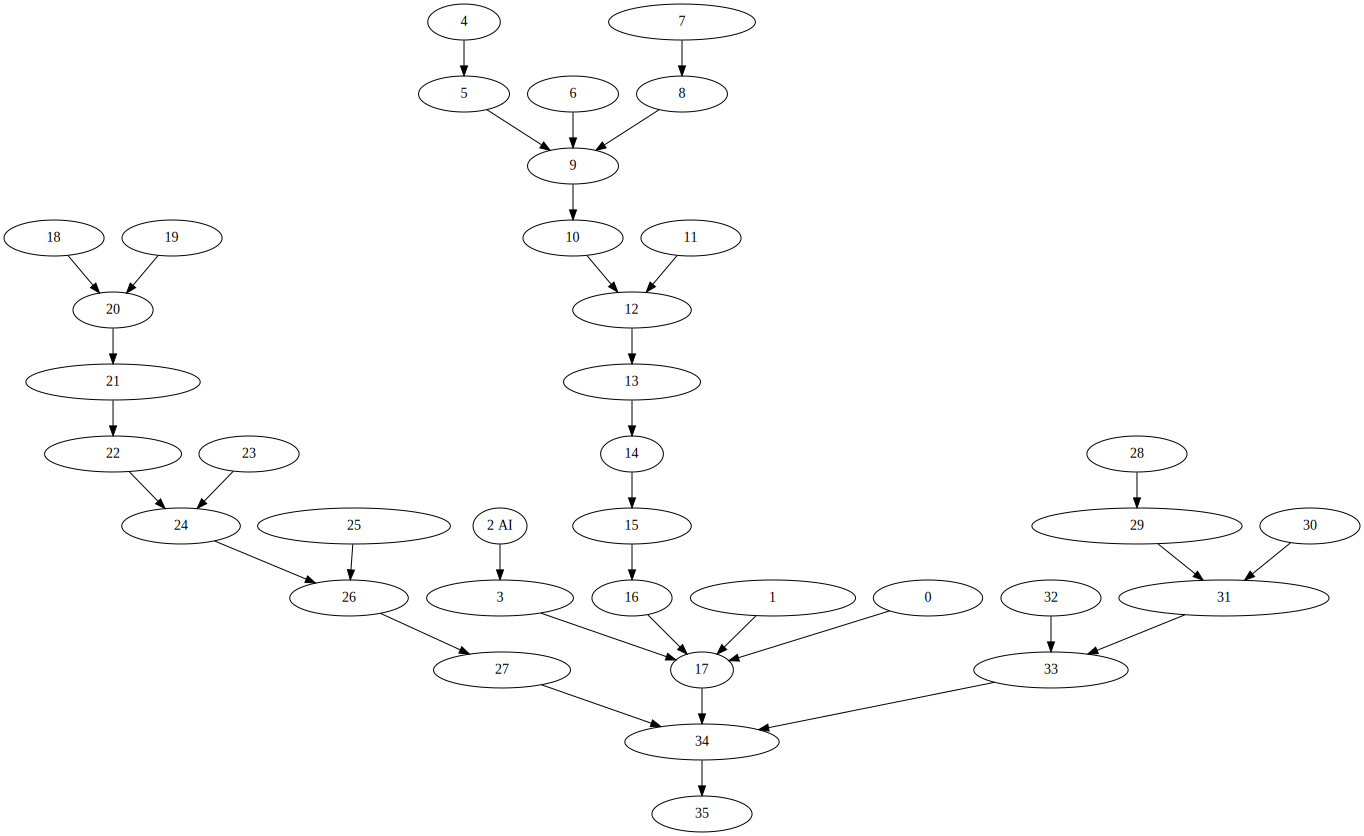

In [ ]:
from graphviz import Digraph

sentence_num = 1
unsigned_sentence = unsign(sentences[sentence_num])
poses = get_pos(sentences[sentence_num])

graph = Digraph(format="png")

for i, chunk in enumerate(sentences[sentence_num]):
    if chunk.dst != -1:
        tail = str(i) + " " + unsigned_sentence[i]
        head = str(chunk.dst) + " " + unsigned_sentence[chunk.dst]
        graph.edge(tail, head)
graph

##45. 動詞の格パターンの抽出

In [ ]:
# 文節(助詞=格)　→係り先→ 動詞（述語）
# 出力形式 : 述語 \t 格 \s 格

In [ ]:
with open("./case.txt", "w") as f:
    for sentence in sentences:
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == "動詞":
                    cases = []
                    for src in chunk.srcs:  #動詞の係り元chunkから助詞を探す
                        # 係り元chunkに含まれる形態素が助詞であればその表層形を取得
                        case = [src_morph.surface for src_morph in sentence[src].morphs if src_morph.pos == "助詞"]
                        cases.extend(case)
                    if len(cases) > 0:
                        cases = " ".join(sorted(cases)) # 助詞をスペース区切りで辞書順に並べる
                        line = morph.base + "\t" + cases + "\n"

                        f.write(line)
                    break

In [ ]:
# コーパス中で頻出する述語と格パターンの組み合わせ
! cat ./case.txt | sort | uniq -c | sort -nr | head -n 10

     49 する	を
     18 する	が
     15 する	に
     14 する	と
     12 する	は を
     10 する	に を
      9 よる	に
      9 する	で を
      8 行う	を
      7 する	が に


In [ ]:
# 「行う」「なる」「与える」という動詞の格パターン
! cat ./case.txt | grep "行う" | sort | uniq -c | sort -nr | head -n 5

      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	は を
      1 行う	に を を


In [ ]:
! cat ./case.txt | grep "なる" | sort | uniq -c | sort -nr | head -n 5

      3 なる	に は
      3 なる	が と
      2 なる	に
      2 なる	と
      1 異なる	も


In [ ]:
! cat ./case.txt | grep "与える" | sort | uniq -c | sort -nr | head -n 5

      1 与える	に は を
      1 与える	が に
      1 与える	が など に


##46. 動詞の格フレーム情報の抽出

In [ ]:
# 文節(助詞=格)　→係り先→ 動詞（述語）
# 出力形式 : 述語 \t 格 \s 格

In [ ]:
with open("./case_frame.txt", "w") as f:
    for sentence in sentences:
        unsigned_sentence = unsign(sentence)
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == "動詞":
                    cases = []
                    frames = []
                    for src in chunk.srcs:  #動詞の係り元chunkから助詞を探す
                        # 係り元chunkに含まれる形態素が助詞であればその表層形を取得
                        case = [src_morph.surface for src_morph in sentence[src].morphs if src_morph.pos == "助詞"]
                        cases.extend(case)
                        if len(case) > 0:
                            frames.append(unsigned_sentence[src])   # 述語に係る文節を取得

                    if len(cases) > 0:
                        cases = " ".join(sorted(cases)) # 助詞をスペース区切りで辞書順に並べる
                        frames = " ".join(sorted(frames))   # 述語に係る文節をスペース区切りで辞書順に並べる
                        line = "\t".join([morph.base, cases, frames]) + "\n"

                        f.write(line)
                    break

##47. 機能動詞構文のマイニング

In [ ]:
# 「サ変接続名詞+を（助詞）」で構成される文節か判定する関数
def sahen_wo(chunk):
    if len(chunk.morphs) == 2:
        sahen = chunk.morphs[0].pos1 == "サ変接続"
        wo = chunk.morphs[1].surface == "を"
        return sahen and wo
    return False

In [ ]:
with open("./sahen_noun_wo.txt", "w") as f:
    for sentence in sentences:
        unsigned_sentence = unsign(sentence)
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == "動詞":
                    for src in reversed(chunk.srcs):  #動詞の係り元chunkから助詞を探す
                        if sahen_wo(sentence[src]):
                            sahen_wo_verb = unsigned_sentence[src] + morph.base
                            cases = []
                            frames = []
                            for sahen_src in chunk.srcs:
                                if sahen_src == src:
                                    continue

                                case = [src_morph.surface for src_morph in sentence[sahen_src].morphs if src_morph.pos == "助詞"]
                                cases.extend(case)
                                if len(case) > 0:
                                    frames.append(unsigned_sentence[sahen_src])

                            if len(cases) > 0:
                                cases = " ".join(sorted(cases))
                                frames = " ".join(sorted(frames))
                                line = "\t".join([sahen_wo_verb, cases, frames]) + "\n"

                                f.write(line)
                            break

##48. 名詞から根へのパスの抽出

In [ ]:
# 名詞から根へのパスを抽出
def get_path_to_root(sentence):
    unsigned_sentence = unsign(sentence)
    poses = get_pos(sentence)
    for i, chunk in enumerate(sentence):
        if "名詞" in poses[i]:
            dst = i
            path_to_root = []
            while dst != -1:
                path_to_root.append(unsigned_sentence[dst])
                dst = sentence[dst].dst
            print(" -> ".join(path_to_root))

In [ ]:
sentence_num = 2
get_path_to_root(sentences[sentence_num])

日本大百科全書(ニッポニカ)』の -> 解説で -> 述べている
解説で -> 述べている
情報工学者通信工学者の -> 佐藤理史は -> 述べている
佐藤理史は -> 述べている
次のように -> 述べている


##49. 名詞間の係り受けパスの抽出

In [ ]:
# パターン1 ... 「 i -> a -> b -> j -> 根　」 ならば 「 i -> a -> b -> j 」
# パターン2 ... 「 i -> a -> k -> 根 」　かつ 「 j -> b -> k -> 根 」 ならば 「 i -> a | j -> b | k」
#    ( 文節 i, j に含まれる名詞をそれぞれ X, Y に変換)

import re

# 記号除去した文節を抽出し、名詞をX,Yに置換する関数
def repl_noun(chunk, character_X_Y):
    noun = [(morph.surface, morph.pos) if morph.pos != "記号" else ("", "") for morph in chunk.morphs]
    noun = [morph[0] if morph[1] != "名詞" else character_X_Y for morph in noun]
    noun = "".join(noun)

    # 連続するX,Yを1つのX,Yに置換 XXXXX→X
    re_character_X_Y = character_X_Y + "+"
    noun = re.sub(re_character_X_Y, character_X_Y, noun)

    return noun

# 名詞を含む文節から根までのパスを取得
def noun_path(sentence):
    unsigned_sentence = unsign(sentence)
    poses = get_pos(sentence)
    pathes = {}
    for i, chunk in enumerate(sentence):
        if "名詞" in poses[i]:
            dst = chunk.dst
            path_to_root = []

            while dst != -1:
                path_to_root.append(dst)
                dst = sentence[dst].dst

            pathes[i] = path_to_root
    return pathes

def depend_path(sentence):
    unsigned_sentence = unsign(sentence)
    pathes = noun_path(sentence)

    for i, chunk in enumerate(sentence):    # 文節iを探す
        if i in pathes.keys():    # 文節iであるか判定(psthesは名詞を含む)
            i_noun = repl_noun(chunk, "X")

            for j in range(i+1, len(sentence)):    # 文節jを探す
                if j in pathes.keys():    # 文節jであるか判定
                    # パターン1の場合
                    if j in pathes[i]:
                        out_path = [i_noun]
                        for k in pathes[i]:
                            if j == k:
                                j_noun = repl_noun(sentence[j], "Y")
                                out_path.append(j_noun)
                                print(" -> ".join(out_path))
                            out_path.append(unsigned_sentence[k])

                    # パターン2の場合
                    else:
                        for dst in pathes[j]:
                            if dst in pathes[i]:    # 文節iのパスと交わるか判定
                                depending_out = [i_noun]
                                j_noun = repl_noun(sentence[j], "Y")
                                depended_out = [j_noun]

                                # 文節iから文節kに至る直前までのパス
                                for k in pathes[i]:
                                    if k == dst:
                                        depending_out = " -> ".join(depending_out)
                                        break
                                    depending_out.append(unsigned_sentence[k])

                                # 文節jから文節kに至る直前までのパス
                                for k in pathes[j]:
                                    if k == dst:
                                        depended_out = " -> ".join(depended_out)
                                        break
                                    depended_out.append(unsigned_sentence[k])

                                # 文節iから文節kに至る直前までのパス, 文節jから文節kに至る直前までのパス, 文節kの内容を” | “で連結
                                out = " | ".join([depending_out, depended_out, unsigned_sentence[dst]])
                                print(out)
                                break

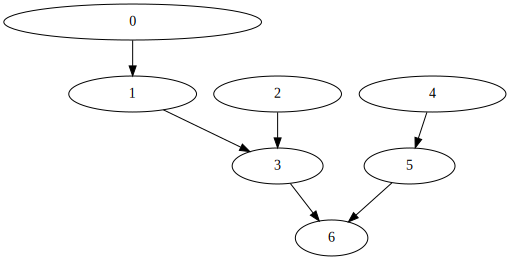

In [ ]:
from graphviz import Digraph

sentence_num = 6
unsigned_sentence = unsign(sentences[sentence_num])
poses = get_pos(sentences[sentence_num])

graph = Digraph(format="png")

for i, chunk in enumerate(sentences[sentence_num]):
    if chunk.dst != -1:
        tail = str(i) + " " + unsigned_sentence[i]
        head = str(chunk.dst) + " " + unsigned_sentence[chunk.dst]
        graph.edge(tail, head)
graph

In [ ]:
sentence_num = 6
depend_path(sentences[sentence_num])

第Xでの -> Yは
第Xでの -> 人工知能は | Yと | 呼ばれ
第Xでの -> 人工知能は -> 呼ばれ | YのYな -> ものが | ある
第Xでの -> 人工知能は -> 呼ばれ | Yが | ある
Xは | Yと | 呼ばれ
Xは -> 呼ばれ | YのYな -> ものが | ある
Xは -> 呼ばれ | Yが | ある
Xと -> 呼ばれ | YのYな -> ものが | ある
Xと -> 呼ばれ | Yが | ある
XのXな -> Yが
